# Monoids and Monads

Monoids and monads are concepts from category theory that have applications in programming.
More specifically, both of these concepts are type classes, meaning, a type in Julia can be "monoidal" or not.
Although, this actually depends on the composition operator.


## 1. Monoids

We start with a more simplified definition and then we move to a more general yet more complex definition,
which is based on Category Theory.

### 1.1. Monoids in Set Theory
A monoid is a category composed of a single object (type), a neutral element and an operator, e.g. $(M,e,\otimes)$.
In programming, $M$ is a type, $\otimes$ is a function with two arguments of type $M$, and $e$ is a value of type $M$;

One type that is "monoidal" are strings. Note, `(String, "", *)` is a monoid. Why? Because
`*` acts as the composition function that is associative and closed under string composition (meaning, `string_1 * string_2`
always returns another value of type `String`), and `""` is indeed a neutral element since `"" * string_1 == string_1 * ""` is
always true.

Let's define the monoid as a type class in Julia. 

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/CategoryTheory`


In [2]:
abstract type Monoid end
struct IsMonoid <: Monoid end
struct NotMonoid <: Monoid end
    
Monoid(::Type) = NotMonoid()
Monoid(::Type{<:String}) = IsMonoid()


Monoid

Above we've used `Monoid(::Type{<:String}) = IsMonoid()` to indicate that a `String` type belongs to the class of monoids.
To belong to the class of monoids, we must define a neutral element and define a composition operation.

In [3]:
neutral(::Type{<:String}) = ""
⊗(s1::T, s2::T) where T <: String = s1 * s2

"ok" ⊗ "nn" ⊗ "mm" ⊗ neutral(String)

"oknnmm"

The triple (`Int`,`0`,`+`) is also a monoid. Let's add it to our class. Actually,
we can add (`Real`,`0`,`+`), since it's also a monoid and `Int` is a subtype of `Real`.

In [4]:
Monoid(::Type{<:Real}) = IsMonoid()
neutral(T::Type{<:Real}) = convert(T,0)
⊗(s1::T, s2::T) where T <: Real = s1 + s2

⊗ (generic function with 2 methods)

In [5]:
@show neutral(Int)
@show neutral(Float64);
@show neutral(Real);

neutral(Int) = 0
neutral(Float64) = 0.0
neutral(Real) = 0


Finally, let's implement the Holy Trait in order to dispatch on monoids, i.e., define functions
that are valid only if the type is from the class of monoids.

In [6]:
ismonoid(x::T) where T  = ismonoid(Monoid(T))
ismonoid(::IsMonoid) = true
ismonoid(::NotMonoid) = false

ismonoid (generic function with 3 methods)

In [7]:
@show ismonoid("string")
@show ismonoid((1,2));

ismonoid("string") = true
ismonoid((1, 2)) = false


Another example of a monoid is a pair of monoids, such that
$(a_1,b_1) \otimes (a_2,b_2) = (a_1 \otimes a_2, b_1 \otimes b_2)$. One can check that all
the properties for a monoid are satisfied.

In [8]:
Monoid(::Type{<:Tuple{String,Real}}) = IsMonoid()

neutral(::Type{Tuple{T1,T2}}) where {T1, T2} = (neutral(T1), neutral(T2))
neutral(Tuple{String,Int})

("", 0)

### 1.2 Monoidal Categories

Note that this definition of a monoid was very "set-based". We've talked about $e$ as an element of $M$, and 
$M$ as a set. A question that might be posed is how does this translates to category theory?

One way to do this is to note that for any monoid $(M,e,\otimes)$, where $M$ is a set and $e \in M$, we can
define a category $\mathcal M$ where there is only one object $M$ and the morphisms are the elements of $M$.
Lastly, the $\otimes$ operator defines the composition of morphisms and $e$ is the identity morphism.

An example of this is the set of natural numbers plus 0. The $0$ is the identity morphism, hence,
$0: M \to M$ is a morphism, and $1:M \to  M$ is also a morphism. In this category,
$0 \circ 1$ is equivalent to the $2$ morphism.

Another way to think of monoids in Category Theory is to identify whether an existing category
has this "monoidicity". A category that has this property is called a monoidal category.
The formalization of this concept is not so simple, but here it is.

Let $\mathcal C$ be a category, and $\mathcal C \times \mathcal C$ be the product category
of $\mathcal C$ with itself.

---
**Definition (Monoidal Category)**. A monoidal category $\mathcal C$ consists of the following:

* A functor $\otimes: \mathcal C \times \mathcal C \to \mathcal C$, called the tensor functor;

* An object $1$ of $\mathcal C$, called the unit object;

* A natural isomorphism (a natural transformation with an inverse) $\alpha : (\cdot \otimes \cdot) \otimes \cdot \to \cdot \otimes (\cdot \otimes \cdot)$. This is a way to enforce assotiativity via isomorphism instead of equality;

* A natural isomorphism $\lambda: (1 \otimes \cdot) \to \cdot$. This is a way to enforce the neutral element from the left via isomorphism.

* A natural isomorphism $\rho: (\cdot \otimes 1) \to \cdot$. This is a way to enforce the neutral element from the right via isomorphism.


The $\otimes, 1, \alpha, \lambda, \rho$ must satisfy two properties:

* The petagon diagram below must commute:

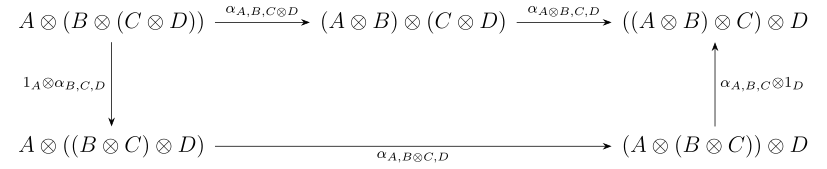

* The triagular diagram below must commute:

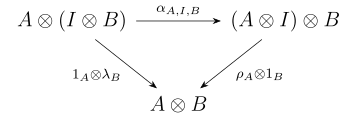

---

Forget for a minute about the properties of the commuting diagrams.
Note that in the definition above, the monoidal category is $(\mathcal C, 1, \otimes_{\alpha, \lambda, \rho})$, which is analogous to our
definition of a monoid, with the difference that we don't have the equality of associativity or identity, but only
natural isomorphism, e.g. $(a \otimes b) \otimes c$ is isomorphic to $a \otimes (b \otimes c)$, and not necesserily equal,
and so is $1 \otimes a$ and $a \otimes 1$ to $a$. An example of this, for the category $\mathbf{Sets}$, we don't have
$(A \times B) \times C = A \times (B \times C)$, yet, these sets are isomorphic.

### 1.3 Monoids in Category Theory

From the concept of a monoidal category, we can now create a more general definition of what a monoid is in Category Theory.

---
**Definition (Monoid - Category Theory)**. Let $(\mathcal C, 1, \otimes_{\alpha, \lambda, \rho})$ 
be a monoidal category. For an object $M \in Ob_{\mathcal C}$, we say that $(M, \eta, \mu)$ is a monoid if
$\eta: 1 \to M$ and $\mu: M \otimes M \to M$ are two morphisms of $\mathcal C$, such that:

* The pentagon diagram below commutes:

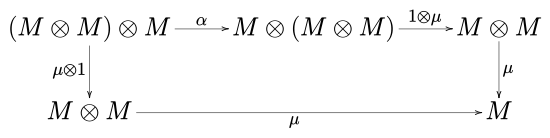

* The triangular diagram below commutes:


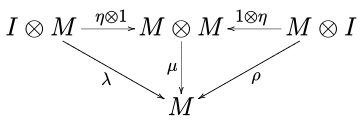


Note that $\mu$ is called the *multiplication* and $\eta$ the *unit*.

---

How does this definition generalizes the set theoretic version? Note that category $\mathbf{Sets}$
is a monoidal category, with $\otimes$ equals to the cartesian product of sets, and $1$ equal to the
corresponding terminal object (which is the singleton set in this case).
Thus, take, as an example, a set $M$ such as $\mathbb N$. Then, the morphism $\mu:M \times M \to M$ will be $+:\mathbb N \times \mathbb N \to \mathbb N$
and $\eta: 1 \to \mathbb N$ as the morphism that is isormorphic to the element $0$.
We can then show that these two morphisms satisfy the pentagon and triangular diagrams, and are therefore
categorical monoids.

Furthermore, one can prove that every monoid in the set theoretic sense will also be a monoid in the categorical sense. Hence,
similarly to what happens to the cartesian product, the categorical notion is more general.


---
## 2. Monads

Now that we know what a monoid is, what about a monad?

Let $\mathcal C$ be a category. We can then define a new category $[\mathcal C, \mathcal C]$ of endofunctors
on $\mathcal C$, where endofunctors are objects and natural transformations are morphisms.
One can then prove that such category is monoidal, where the $\otimes$ operator is the composition
of functors (i.e. $F \otimes G \equiv F \circ G$), and the unit is the identity functor $I$.
With this, we can easily define a monad.

**Definition (Monad - Category Theory)** A monad is a monoid in the category of endofunctor.
Hence, a monad in $\mathcal C$ is $(M, \eta,\mu)$, where $M$ is an endofunctor $M:\mathcal C\to \mathcal C$,
with $\eta$ as the unit and $\mu$ as the multiplication.


Informally:

**Monad**:
* $M$ is an endofunctor $m: \mathcal C \to \mathcal C$;
* $\eta:I \rightarrow m$ where $I$ is the identity endofunctor in $\mathcal C$;
* $\mu: M \circ M \rightarrow M$ represents the composition;

satisfying the conditions:

* $\mu \circ M\eta = \mu \circ \eta M  = id_M$ where $id_M$ is the identity natural transformation;
* $\mu \circ M\mu = \mu \circ \mu M$

Note that the conditions above were written informally. For example, $M \eta$ represents the horizontal
composition of $id_M$ with $\eta$, and analogously for $M \mu$, $\mu M$ and $\eta M$.

Let's try to get a feel for such definition by looking at it from the programming
perspective. First, a functor `F` acts on a type `T`(the object of the programming category)
and returns another type `F T`. It also acts on a function `f(x::T)` and returns another function
`Ff(x::F T)`.

In programming (more specifically in Julia), a functor is a
struct `F` together with an `fmap`. For example:

<!-- 
Similarly, a monad is another type class. We've actually seen an example of it with the Kleisi Category.
The idea of the monad is that it keeps track of a context. For example, in the Kleisi Category,
we wanted to code functions that returned logs. The context in that sense would be the log-stream.
Let's redo the example of the Kleisi Category. -->

In [9]:
struct MyFunctor{T}
    x::T
    y::T
end
fmap(f::Function, F::MyFunctor{T}) where T = MyFunctor(f(F.x),f(F.y))

# Example of usage
fmap(string,MyFunctor(1,2))

MyFunctor{String}("1", "2")

Note that our functor `MyFunctor` is an endofunctor, because it take any type `T` which is the object from the programming category and returns a type `MyFunctor{T}`,
which is also an object of our programming category. Hence, `MyFunctor` indeed has the same category as domain and codomain. One can also
prove that our implementation of `fmap` statisfies the composition propoerties in the definition of a functor.

Now, if the **monad** is a monoid of such functors... This means that we need some sort of neutral element
and a way to compose such functors.

How can we construct this?

Let's first take a detour.

### 2.1 Kleisi Category

An embellishing of a function consists of pairing such function with another type that is from the class of monoids.
For example, consider the function `uppercase`. We can embellish it by creating another function
called `e_uppercase` where:

In [1]:
e_uppercase(s::String)::Tuple{String, String} = uppercase(s), "Uppercase. "

e_uppercase (generic function with 1 method)

Note, our embellishing returns both the original output, plus a string. Since the tyep `String` is a monoid, our
example is a valid embellishing.

This sounds strange, but consider the following. I have a bunch of functions, and now I want to get a log
for everytime I run this function. Thus, I want to wrap this function as to return the log.

In [2]:
x = "my string"
upperstring(s::String)::Tuple{String, String} = uppercase(s), "Uppercase. "
splitstring(s::String)::Tuple{Base.Vector{String}, String} = split(s, " "), "Splitting. "
id(s) = s, ""

@show upperstring(x)
@show splitstring(x);

upperstring(x) = ("MY STRING", "Uppercase. ")
splitstring(x) = (["my", "string"], "Splitting. ")


If we try to compose these functions, we'll get an error. Why? Because the output
of `upperstring` is a `Tuple{String, String}`, and the input of `splitstring` must
be a `String`.

```
(splitstring ∘ upperstring)(x) # This returns an error!
```

Hence, it'd be nice to have a way to compose such things.

In [3]:
comp(f::Function, g::Function) = x-> begin
        (y,s1) = g(x)
        (z,s2) = f(y)
        (z, s1*s2)
    end

s = "Ok Example"
comp(id,comp(splitstring , upperstring))(s)

(["OK", "EXAMPLE"], "Uppercase. Splitting. ")

Nice, so this worked. But our example was restricted to this embelishing using log strings. As we've said,
we can actually use any monoidal class, not only strings. Why? Because we know how to compose them.

This means that we can actually define a whole class of functors... What do I mean?
Take a look at the example below:

In [13]:
struct Writer{T,M}
    a::T
    log::M
    function Writer{T,M}(a,log) where {T,M}
        @assert Monoid(M) isa IsMonoid
        new(a,log)
    end
end
Writer(a::T, log::M) where {T,M} = Writer{T,M}(a,log)
fmap(f::Function, W::Writer) = Writer(f(W.a), W.log)

# This `unit` is called `return` in Haskell.
struct unit{M} end
unit{M}(x) where M  = Writer(x, neutral(M))

In [14]:
emb_split(x::String) = Writer(split(x),"Split.")
emb_upper(x::String) = Writer(uppercase(x), "Upper.")

# Composition for embellished functions
⊙(f, g) = x-> begin
    w1 = g(x)
    w2 = f(w1.a)
    return Writer(w2.a, w1.log ⊗ w2.log)
end

⊙ (generic function with 1 method)

In [15]:
(unit{String} ⊙ emb_split ⊙ emb_upper)("testing this")

Writer{Vector{SubString{String}}, String}(SubString{String}["TESTING", "THIS"], "Upper.Split.")

The `Writer{T,M}` struct above defines *more* than a single functor, it actually defines a whole class of possible
functors, each one depending on the monoidal type `M`. For example, `Writer{s,String}` is the functor
that embelishes functions with strings. Another possible functor would be `Writer{T,Int}` which
embellished with integers.

In [16]:
mult2(x) = 2x
mult2_1(x) = Writer(mult2(x), 1)
mult2_2(x) = Writer(mult2(x), 2)

(mult2_1 ⊙ mult2_2)(2)

Writer{Int64, Int64}(8, 3)

We can now define the **Kleisi Category**. In programming, consider the category
of types, where functions are the morphisms.
For an endofunctor `M` and the programming category, the corresponding Kleisi Category (`K(M)`)
also has types as objecs, yet, the morphism between two types `T` and `S` is not a function
`f(x::T)::S`, but `f(x::T)::M S`, where `M` is the endofunctor. In other words,
we say that there is a morphism between `T` and `S` in the category `K(M)` if there
exists a function from `x::T` that returns a value of type `M S`.
In the example above, for every function `f(x::T)::S`, we could write an embelished version, such as
`Writer(f, "something")`.

Now, to properly define this category, we need to define a way to compose
these morphisms and also we need to guarantee that for each object there is an identity morphism.
For the `Writer{T,M}` functor, we've created a composition using ⊙. The identity with respect to ⊙ was implemented
as `unit(::Type{M})`.

Hence, `K(Writer{T,String})` is an example of Kleisi Category for the functor the embellishes with strings, where we used ⊙ as our composition operator.

**Important**! For a function `f:A->B`, the embellished function `f` with a `Writer{T,String}` is a function
`emb_f:A -> Writer{B,String}`. Considering any monad `m`, the embellished function would be
`emb_f:A -> m B`.

### 2.2 Back to Monads

We've defined a Kleisi Category. But what about monads?
Well, a monad `m` is just a functor that forms a Kleisi Category, i.e.
a functor `m` together with a composition operation `⊙` and a `unit` function.
Hence, in our example above,
the `Writer{T,String}` functor is a monad, and so is the `Writer{T,Int}`.

Note that our `Writer` construction provided a whole range of monads. For each
monoidal type `m`, the `Writer{T,M}` represents a monad.

Hence, programmatically speaking, a monad `m` is an endofunctor, together 
with a composition operator and an identity in relation to this operator.


We can also define a monad by provinding a `bind` function. This function is
part of the implementation of operator `⊙`. Yet, instead of composing
two embellished functions, it composes a value of type `Writer{T,M}`
with an embellished function.

Check the implementation below.

In [17]:
bind(w::Writer, f) = let
    w2 = f(w.a)
    return Writer(w2.a, w.log ⊗ w2.log)
end

bind (generic function with 1 method)

In [18]:
emb_len(x::String) = Writer(length(x),"Length.")

bind(Writer("str","Str."),emb_len)

Writer{Int64, String}(3, "Str.Length.")

We can break this down even further. Since `m` is a functor, we have an `fmap` associated. Yet,
note that this will actually return a `Writer{Writer{T,M},M}`, because our `fmap`
goes into the `Writer` value and exchanges the `a::T` for `f(a)::Writer{b,M}`.

In [19]:
fmap(emb_len, Writer("str",""))

Writer{Writer{Int64, String}, String}(Writer{Int64, String}(3, "Length."), "")

We need another function that "flattens" the nested `Writer`. This is where `join` comes in. 

In [20]:
join(w::Writer{Writer{T,M},M}) where T where M = Writer(w.a.a,w.log ⊗ w.a.log )

join(Writer(Writer(1,"1"),"2"))

Writer{Int64, String}(1, "21")

We can now rewrite our `bind` function using these two more abstract implementations.

In [21]:
bind(w::Writer, f) = join(fmap(f, w))
bind(Writer("str","Str."),emb_len)

Writer{Int64, String}(3, "Str.Length.")

**Very elegant!** 

### 2.3 Back to the Mathematical Definition of Monad

We've defined our monad as a functor `m` plus a composition (or bind function) and an identity (unit) function.
These conditions emerged in order to properly define the Kleisi Category, which, in the context of programming,
is a category where types as the objects and *embellished functions*  are the morphisms!

But what about our mathematical definition where $(m,\eta, \mu)$ was the monad?

Now it's actually "simple", since we've done all the heavy lifting. The
`unit` function is the $\eta$, and the `join` function is the $\mu$.

Remember, $\mu:m \circ m \to m$ is our natural transformation, meaning that
for every object $a \in \mathcal C$, we have $\mu_a: m(m(a)) \to m(a)$.
Thus, for every possible type `T`, `join(a::m(m(T))::m(a)`.

### 2.4 Vector Monad

Consider the `Vector{T}` functor. Let's define the following natural transformations $\eta$ and $\mu$:

In [22]:
Vector(T::Type) = Vector{T}
fmap(f,v::Base.Vector) = [f(i) for i in v]
vector(x::T...) where T = [x...]

vector(1,2,3)

μ(x::Base.Vector{Base.Vector{T}}) where T= vcat(x...)
η(x::T) where T = [x]

η (generic function with 1 method)

Does (`Vector{T}`,`η`,`μ`) satisfy the monad conditions we've imposed?

In [23]:
x = [1,2,3]
@show μ(fmap(η, x)) == x # This means μ ∘ m η == 1ₘ
@show μ(η(x)) == x # This means μ ∘ η m == 1ₘ

x = [[[1],[2,3]],[[1]]]
@show μ(fmap(μ,x)) == μ(μ(x));

μ(fmap(η, x)) == x = true
μ(η(x)) == x = true
μ(fmap(μ, x)) == μ(μ(x)) = true
